## Proyecto Final: 
Mirka Monzón 18139  
Daniela Villamar 19086  
Alexa Bravo  18831  
Mayo 17, 2022

### Análisis Exploratorio

In [82]:
#Importamos las librerias necesarias. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, normalize
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,roc_curve
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Cargamos los datos del dataset.
df = pd.read_csv('IAProyecto.csv', delimiter=';')
df.head(5)

,Gender,Age,Employment Status,Education,Matrial Status,Income,LoanApproved
0,Male,27,Full time,High,Single,Medium,Yes
1,Male,60,Full time,Medium,Married,High,No
2,Male,25,Full time,High,Single,Medium,No
3,Male,35,Full time,High,Single,High,Yes
4,Female,50,Unemployed,Low,DP,Medium,No


**Descripción de las columnas**  
*Gender*: indica el genero del solicitante (femenino o masculino).   
*Age:* Edad del solicitante en un rango de 20 a 64 años.   
*Employment Status:* El estado laboral del solicitante (tiempo completo, medio tiempo, desempleado, laborando por cuenta propia, retirado, estudiante y no responder).  
*Matrial Status:* Estado civil del solicitante (soltero, casado, divorciado, viudo).  
*Income:* Indica los ingresos del solicitante (alto, medio, bajo).    
*LoanApproved:* Indifa si el solicitante obtuvo el prestamo (si, no).  

In [3]:
#Vemos la cantidad total de datos.
print('Total de datos:', len(df))

Total de datos: 8790


In [4]:
#Vemos la información de los datos. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             8790 non-null   object
 1   Age                8790 non-null   int64 
 2   Employment Status  8790 non-null   object
 3   Education          8790 non-null   object
 4   Matrial Status     8790 non-null   object
 5   Income             8790 non-null   object
 6   LoanApproved       8790 non-null   object
dtypes: int64(1), object(6)
memory usage: 480.8+ KB


In [5]:
#Vemos si las columnas tienen datos faltantes.  
df.isna().sum().to_frame()

,0
Gender,0
Age,0
Employment Status,0
Education,0
Matrial Status,0
Income,0
LoanApproved,0


#### Anális de cada variable por separado

In [6]:
#Cantidad de datos por opción de la columna "Gender"
pd.value_counts(df['Gender'])

Female    4409
Male      4381
Name: Gender, dtype: int64

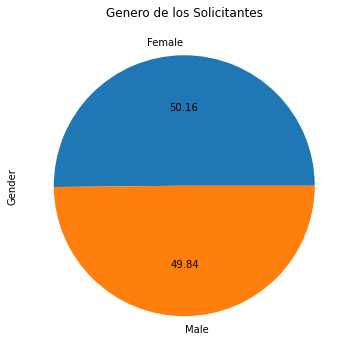

In [7]:
#Gráfica representativa de los datos de "Gender"
plot = df['Gender'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6),
                                            title='Genero de los Solicitantes')

In [8]:
#Cantidad de datos por opción de la columna "Age"
pd.value_counts(df['Age'])

33    240
34    237
24    236
38    233
37    229
30    223
32    222
36    221
41    220
43    220
54    218
35    217
42    210
46    207
51    207
40    207
39    205
31    202
58    201
53    200
60    196
52    196
57    195
44    194
23    191
49    190
59    189
56    189
61    189
26    185
29    183
48    183
55    182
28    182
50    177
25    176
62    172
47    172
45    168
21    166
64    166
27    165
22    162
63    135
20    132
Name: Age, dtype: int64

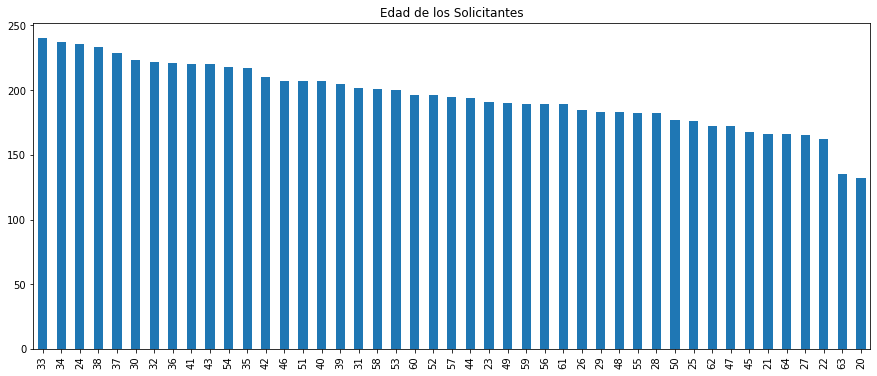

In [9]:
#Gráfica representativa de los datos de "Age"
plot = df['Age'].value_counts().plot(kind='bar', figsize=(15, 6),
                                            title='Edad de los Solicitantes')

In [10]:
#Cantidad de datos por opción de la columna "Education "
pd.value_counts(df['Employment Status'])

Full time               4602
Unemployed              1265
Part time                970
Retired                  786
Self employed            606
A student                461
Prefer not to answer     100
Name: Employment Status, dtype: int64

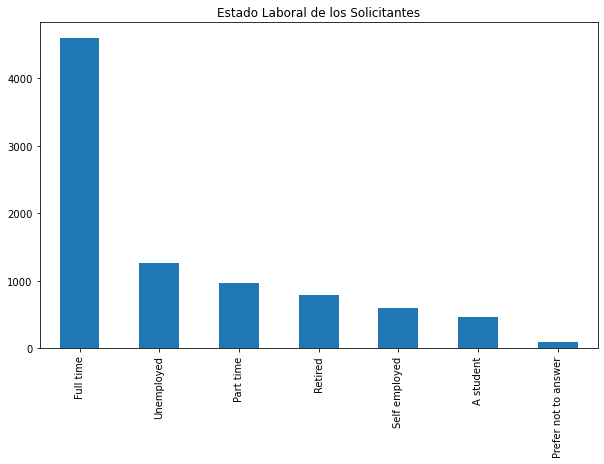

In [11]:
#Gráfica representativa de los datos de "Age"
plot = df['Employment Status'].value_counts().plot(kind='bar', figsize=(10, 6),
                                            title='Estado Laboral de los Solicitantes')

In [12]:
#Cantidad de datos por opción de la columna "Education "
pd.value_counts(df['Education'])

High      3811
Medium    2661
Low       2318
Name: Education, dtype: int64

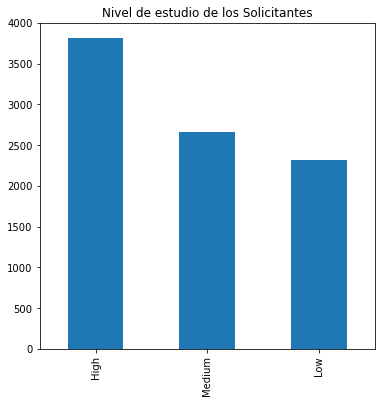

In [13]:
#Gráfica representativa de los datos de "Education"
plot = df['Education'].value_counts().plot(kind='bar', figsize=(6, 6),
                                            title='Nivel de estudio de los Solicitantes')

In [14]:
#Cantidad de datos por opción de la columna "Matrial Status"
pd.value_counts(df['Matrial Status'])

Married     4746
Single      2194
DP          1129
Divorced     605
Widowed      116
Name: Matrial Status, dtype: int64

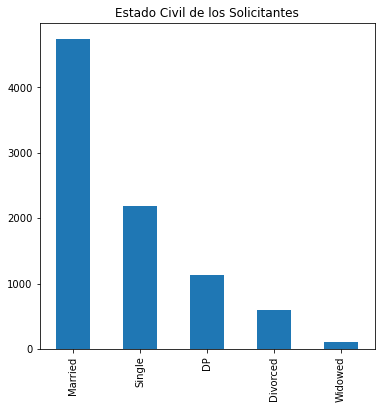

In [15]:
#Gráfica representativa de los datos de "Matrial Status"
plot = df['Matrial Status'].value_counts().plot(kind='bar', figsize=(6, 6),
                                            title='Estado Civil de los Solicitantes')

In [16]:
#Cantidad de datos por opción de la columna "Income"
pd.value_counts(df['Income'])

Medium    3308
High      3286
Low       2196
Name: Income, dtype: int64

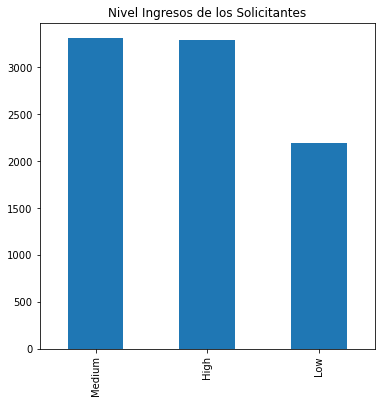

In [17]:
#Gráfica representativa de los datos de "Income"
plot = df['Income'].value_counts().plot(kind='bar', figsize=(6, 6),
                                            title='Nivel Ingresos de los Solicitantes')

In [18]:
#Cantidad de datos por opción de la columna "LoanApproved"
pd.value_counts(df['LoanApproved'])

Yes     4435
No      4355
Name: LoanApproved, dtype: int64

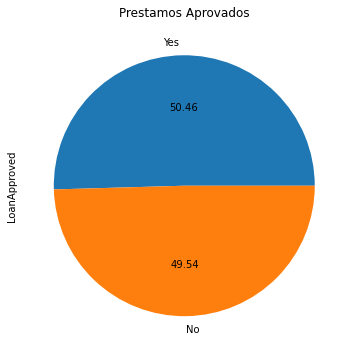

In [19]:
#Gráfica representativa de los datos de "LoanApproved"
plot = df['LoanApproved'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(6, 6),
                                            title='Prestamos Aprovados')

#### Análisis de la relación de "LoanApproved" con las demas variables.

In [20]:
#Cantidad de datos por opción de la columna "Gender" con relación a "LoanApproved"
pd.crosstab(index=df['Gender'],
            columns=df['LoanApproved'], margins=True)

LoanApproved,No,Yes,All
Gender,,,
Female,2199,2210,4409
Male,2156,2225,4381
All,4355,4435,8790


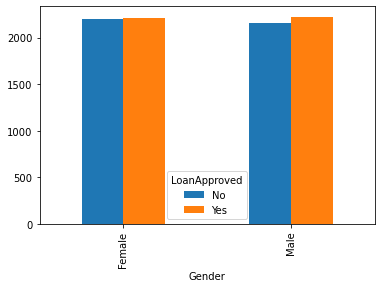

In [21]:
#Gráfica representativa de los datos de "Gender" con relación a "LoanApproved"
plot = pd.crosstab(index=df['Gender'],
            columns=df['LoanApproved']).plot(kind='bar')

In [22]:
#Cantidad de datos por opción de la columna "Age" con relación a "LoanApproved"
pd.crosstab(index=df['Age'],
            columns=df['LoanApproved'], margins=True)

LoanApproved,No,Yes,All
Age,,,
20,60,72,132
21,68,98,166
22,83,79,162
23,100,91,191
24,109,127,236
25,92,84,176
26,105,80,185
27,83,82,165
28,88,94,182


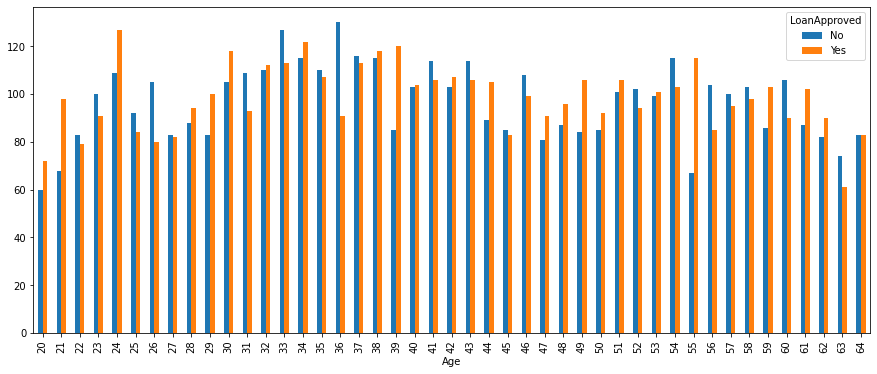

In [23]:
#Gráfica representativa de los datos de "Age" con relación a "LoanApproved"
plot = pd.crosstab(index=df['Age'],
            columns=df['LoanApproved']).plot(kind='bar', figsize=(15, 6))

In [24]:
#Cantidad de datos por opción de la columna "Employment Status" con relación a "LoanApproved"
pd.crosstab(index=df['Employment Status'],
            columns=df['LoanApproved'], margins=True)

LoanApproved,No,Yes,All
Employment Status,,,
A student,215,246,461
Full time,2299,2303,4602
Part time,499,471,970
Prefer not to answer,51,49,100
Retired,402,384,786
Self employed,285,321,606
Unemployed,604,661,1265
All,4355,4435,8790


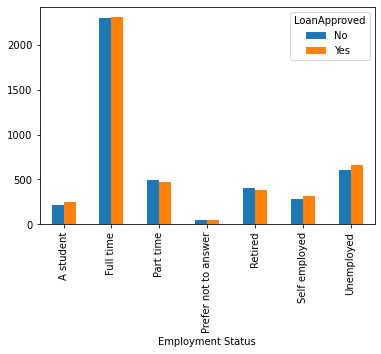

In [25]:
#Gráfica representativa de los datos de "Education" con relación a "LoanApproved"
plot = pd.crosstab(index=df['Employment Status'],
            columns=df['LoanApproved']).plot(kind='bar')

In [26]:
#Cantidad de datos por opción de la columna "Education" con relación a "LoanApproved"
pd.crosstab(index=df['Education'],
            columns=df['LoanApproved'], margins=True)

LoanApproved,No,Yes,All
Education,,,
High,1912,1899,3811
Low,1130,1188,2318
Medium,1313,1348,2661
All,4355,4435,8790


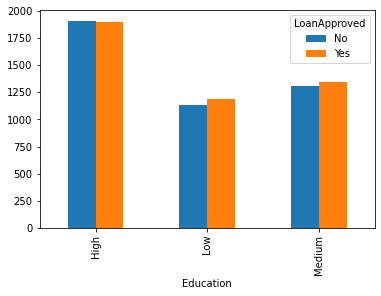

In [27]:
#Gráfica representativa de los datos de "Education" con relación a "LoanApproved"
plot = pd.crosstab(index=df['Education'],
            columns=df['LoanApproved']).plot(kind='bar')

In [28]:
#Cantidad de datos por opción de la columna "Matrial Status" con relación a "LoanApproved"
pd.crosstab(index=df['Matrial Status'],
            columns=df['LoanApproved'], margins=True)

LoanApproved,No,Yes,All
Matrial Status,,,
DP,561,568,1129
Divorced,301,304,605
Married,2352,2394,4746
Single,1079,1115,2194
Widowed,62,54,116
All,4355,4435,8790


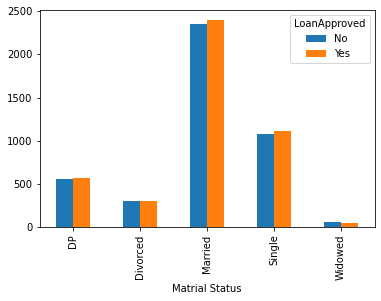

In [29]:
#Gráfica representativa de los datos de "Matrial Status" con relación a "LoanApproved"
plot = pd.crosstab(index=df['Matrial Status'],
            columns=df['LoanApproved']).plot(kind='bar')

In [30]:
#Cantidad de datos por opción de la columna "Income" con relación a "LoanApproved"
pd.crosstab(index=df['Income'],
            columns=df['LoanApproved'], margins=True)

LoanApproved,No,Yes,All
Income,,,
High,1607,1679,3286
Low,1090,1106,2196
Medium,1658,1650,3308
All,4355,4435,8790


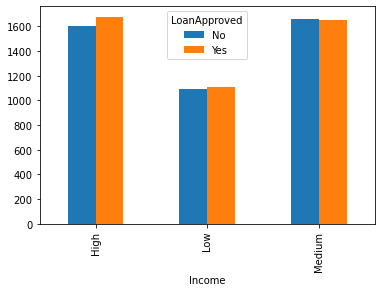

In [31]:
#Gráfica representativa de los datos de "Income" con relación a "LoanApproved"
plot = pd.crosstab(index=df['Income'],
            columns=df['LoanApproved']).plot(kind='bar')

### Pre-Procesamiento

#### Pasamos las variables categoricas a numericas

In [35]:
#Utilizamos LabelEncoder para transformar las variables. 
le = LabelEncoder()

In [36]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].value_counts()

0    4409
1    4381
Name: Gender, dtype: int64

**Donde:**  
    0 --> Female  
    1 --> Male   

In [37]:
df['Employment Status'] = le.fit_transform(df['Employment Status'])
df['Employment Status'].value_counts()

1    4602
6    1265
2     970
4     786
5     606
0     461
3     100
Name: Employment Status, dtype: int64

**Donde:**  
    0 --> A Student  
    1 --> Full Time  
    2 --> Part Time  
    3 --> Prefer not to answer  
    4 --> Retired  
    5 --> Self Employed  
    6 --> Unemployed  

In [38]:
df['Education'] = le.fit_transform(df['Education'])
df['Education'].value_counts()

0    3811
2    2661
1    2318
Name: Education, dtype: int64

**Donde:**  
    0 --> High  
    1 --> Low  
    2 --> Medium  

In [39]:
df['Matrial Status'] = le.fit_transform(df['Matrial Status'])
df['Matrial Status'].value_counts()

2    4746
3    2194
0    1129
1     605
4     116
Name: Matrial Status, dtype: int64

**Donde:**  
    0 --> DP     
    1 --> Divorced  
    2 --> Married  
    3 --> Single  
    4 --> Widowed  

In [40]:
df['Income'] = le.fit_transform(df['Income'])
df['Income'].value_counts()

2    3308
0    3286
1    2196
Name: Income, dtype: int64

**Donde:**  
    0 --> High  
    1 --> Low  
    2 --> Medium  

In [41]:
df['LoanApproved'] = le.fit_transform(df['LoanApproved'])
df['LoanApproved'].value_counts()

1    4435
0    4355
Name: LoanApproved, dtype: int64

**Donde:**  
    0 --> Yes    
    1 --> No  

In [42]:
#Observamos nuestro nuevo dataset. 
df.head(5)  

,Gender,Age,Employment Status,Education,Matrial Status,Income,LoanApproved
0,1,27,1,0,3,2,1
1,1,60,1,2,2,0,0
2,1,25,1,0,3,2,0
3,1,35,1,0,3,0,1
4,0,50,6,1,0,2,0


In [43]:
#Vemos algunos datos estadisticos. 
df.describe()

,Gender,Age,Employment Status,Education,Matrial Status,Income,LoanApproved
count,8790.000000,8790.000000,8790.000000,8790.00000,8790.000000,8790.000000,8790.000000
mean,0.498407,41.828100,2.344255,0.86917,1.950284,1.002503,0.504551
std,0.500026,12.534015,1.976719,0.84809,0.939474,0.866170,0.500008
min,0.000000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,31.000000,1.000000,0.00000,2.000000,0.000000,0.000000
50%,0.000000,41.000000,1.000000,1.00000,2.000000,1.000000,1.000000
75%,1.000000,53.000000,4.000000,2.00000,3.000000,2.000000,1.000000
max,1.000000,64.000000,6.000000,2.00000,4.000000,2.000000,1.000000


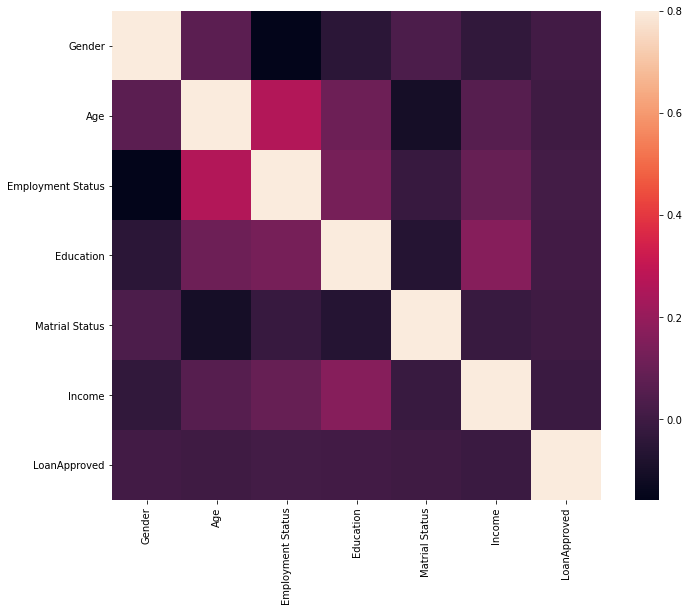

In [44]:
#Matriz de correlación.
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Separación de Datos

In [49]:
#Seleccionamos y separamos en 'x' y 'y' los datos que vamos a utilizar en los modelos. 
x = df.drop('LoanApproved', axis=1)
y = df['LoanApproved']

In [53]:
#Separamos los datos, en train con el 55% y test con el 45%. 
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.45, random_state=123)

In [54]:
#Separamos los datos en train, test y validation para obtener mejores resultados, quedando 55% train, 30% test y 15% validation.  
xVal, xTest, yVal, yTest = train_test_split(xTest, yTest, test_size=0.6666, random_state=123) 

In [61]:
print('Cantidad de datos por grupo: ')
print('Train:', len(yTrain))
print('Test:', len(yTest))
print('Validation:', len(yVal))

Cantidad de datos por grupo: 
Train: 4834
Test: 2638
Validation: 1318


#### Estandarización y normalización de los datos:

In [62]:
#Estandarizamos los datos. 
dataS = StandardScaler()
xTrain = dataS.fit_transform(xTrain)
xTest = dataS.transform(xTest)
xVal = dataS.transform(xVal)

In [66]:
#Normalizamos los datos. 
xTrain = normalize(xTrain)
xTest = normalize(xTest)
xVal = normalize(xVal)

In [67]:
#Verificamos que los datos esten balanceados. 
yTrain.value_counts()

1    2468
0    2366
Name: LoanApproved, dtype: int64

### Modelos

In [68]:
#Creamos una función para hacer nuestras gráficas ROC. 
#https://www.delftstack.com/es/howto/python/plot-roc-curve-python/
def roc(model, xTest, yTest, name):
    n_classes = 2
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(yTest, model.predict_proba(xTest)[:,i], pos_label=i)
    plt.plot(fpr[0], tpr[0], color='orange', linestyle='--', label='Prestamo Aprovado')
    plt.plot(fpr[1], tpr[1], color='green', linestyle='--', label='Prestamo Negado')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

#### Modelo 1: Random Forest Classifier  

In [74]:
#Definimos el modelo.
from sklearn.ensemble import RandomForestClassifier
modeloRFR = RandomForestClassifier(n_estimators=100, random_state=0)
modeloRFR.fit(xTrain, yTrain)

RandomForestClassifier(random_state=0)

##### Datos de Prueba

[[643 701]
 [643 651]]


<AxesSubplot:>

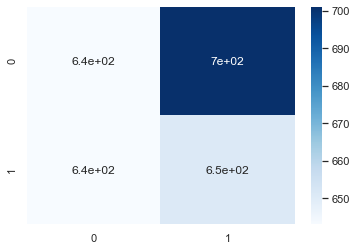

In [88]:
#Hacemos una predicción 
yPred = modeloRFR.predict(xTest)

#Calculamos la Matriz de Confusión 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yTest, yPred)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True)

In [83]:
#Calculamos el Accuracy
print('Test Accuracy:', accuracy_score(yTest, yPred))

Test Accuracy: 0.49052312357846856


In [84]:
#Vemos el reporte de los resultados.
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49      1344
           1       0.48      0.50      0.49      1294

    accuracy                           0.49      2638
   macro avg       0.49      0.49      0.49      2638
weighted avg       0.49      0.49      0.49      2638



##### Datos de Validación 

[[342 303]
 [319 354]]


<AxesSubplot:>

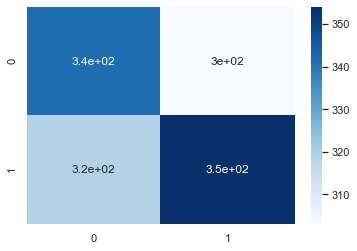

In [92]:
#Hacemos una predicción 
yPred = modeloRFR.predict(xVal)

#Calculamos la Matriz de Confusión 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yVal, yPred)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True)

In [95]:
#Calculamos el Accuracy
print('Validation Accuracy:', accuracy_score(yVal, yPred))

Validation Accuracy: 0.5280728376327769


In [94]:
#Vemos el reporte de los resultados.
print(classification_report(yVal, yPred))

              precision    recall  f1-score   support

           0       0.52      0.53      0.52       645
           1       0.54      0.53      0.53       673

    accuracy                           0.53      1318
   macro avg       0.53      0.53      0.53      1318
weighted avg       0.53      0.53      0.53      1318



##### k-Fold Cross Validation:

In [91]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=10, random_state=33, shuffle=True)
cv.get_n_splits(x)
scores = cross_val_score(modeloRFR, x, y, cv=cv)
print('La media del score es: %.3f ±(%.3f)' % (np.mean(scores), np.std(scores)))

La media del score es: 0.497 ±(0.013)


##### Gráfica de la curva ROC 

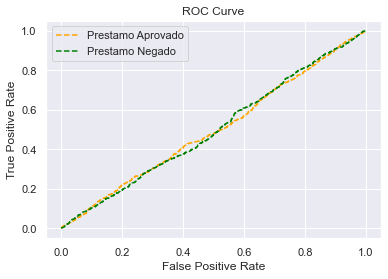

In [86]:
#Realizamos la grafica para el modelo.
roc(modeloRFR, xTest, yTest, 'ROC-RF')

#### Modelo 2: Regresión Logística

In [97]:
#Definimos el modelo.
from sklearn.linear_model import LogisticRegression
modeloRL = LogisticRegression(random_state=0)
modeloRL.fit(xTrain, yTrain)

LogisticRegression(random_state=0)

[[349 995]
 [337 957]]


<AxesSubplot:>

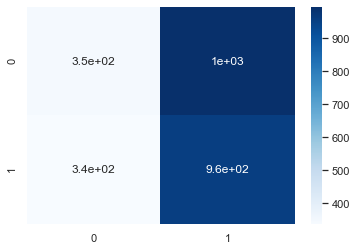

In [98]:
#Hacemos una predicción 
yPred = modeloRL.predict(xTest)

#Calculamos la Matriz de Confusión 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yTest, yPred)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True)

In [99]:
#Calculamos el Accuracy
print('Test Accuracy:', accuracy_score(yTest, yPred))

Test Accuracy: 0.49507202426080366


In [100]:
#Vemos el reporte de los resultados.
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.51      0.26      0.34      1344
           1       0.49      0.74      0.59      1294

    accuracy                           0.50      2638
   macro avg       0.50      0.50      0.47      2638
weighted avg       0.50      0.50      0.46      2638



[[138 507]
 [170 503]]


<AxesSubplot:>

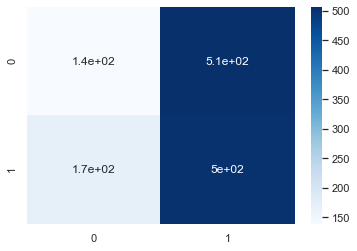

In [101]:
#Hacemos una predicción 
yPred = modeloRL.predict(xVal)

#Calculamos la Matriz de Confusión 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yVal, yPred)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True)

In [102]:
#Calculamos el Accuracy
print('Test Accuracy:', accuracy_score(yVal, yPred))

Test Accuracy: 0.48634294385432475


In [103]:
#Vemos el reporte de los resultados.
print(classification_report(yVal, yPred))

              precision    recall  f1-score   support

           0       0.45      0.21      0.29       645
           1       0.50      0.75      0.60       673

    accuracy                           0.49      1318
   macro avg       0.47      0.48      0.44      1318
weighted avg       0.47      0.49      0.45      1318



In [104]:
cv = KFold(n_splits=10, random_state=33, shuffle=True)
cv.get_n_splits(x)
scores = cross_val_score(modeloRL, x, y, cv=cv)
print('La media del score es: %.3f ±(%.3f)' % (np.mean(scores), np.std(scores)))

La media del score es: 0.495 ±(0.012)


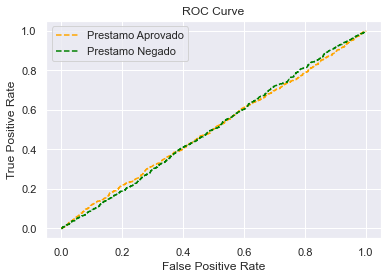

In [106]:
#Realizamos la grafica para el modelo.
roc(modeloRL, xTest, yTest, 'ROC-RF')

#### Modelo 3: Support Vector Machine 